In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("D:\\shru\\Sem 5\\ML\\files\\winequality.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [5]:
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [6]:
Y

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [7]:
Y = np.where(Y > 5, 1, 0)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [9]:
print(X_train.shape)

(1119, 11)


In [10]:
#creating NN
first_layer_size = 32 
model = keras.models.Sequential()
model.add(keras.layers.Dense(64,activation='relu',input_shape=(None, 11)))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, None, 64)          768       
_________________________________________________________________
dense_1 (Dense)              (None, None, 128)         8320      
_________________________________________________________________
dense_2 (Dense)              (None, None, 256)         33024     
_________________________________________________________________
dense_3 (Dense)              (None, None, 1)           257       
Total params: 42,369
Trainable params: 42,369
Non-trainable params: 0
_________________________________________________________________


In [15]:
#to build model
#loss functions
#if one class then binary_crossentropy, if multiclass then categorical_crossentropy
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [28]:
#Write the train input and output variables,size of the batch, number of epochs
history = model.fit(X_train,Y_train.reshape(-1, 1),
                    epochs= 100,
                    verbose=2)

Epoch 1/100
35/35 - 0s - loss: 0.4927 - accuracy: 0.7542
Epoch 2/100
35/35 - 0s - loss: 0.4850 - accuracy: 0.7516
Epoch 3/100
35/35 - 0s - loss: 0.4807 - accuracy: 0.7560
Epoch 4/100
35/35 - 0s - loss: 0.4752 - accuracy: 0.7712
Epoch 5/100
35/35 - 0s - loss: 0.4813 - accuracy: 0.7605
Epoch 6/100
35/35 - 0s - loss: 0.4775 - accuracy: 0.7578
Epoch 7/100
35/35 - 0s - loss: 0.4818 - accuracy: 0.7587
Epoch 8/100
35/35 - 0s - loss: 0.4782 - accuracy: 0.7605
Epoch 9/100
35/35 - 0s - loss: 0.4906 - accuracy: 0.7480
Epoch 10/100
35/35 - 0s - loss: 0.4738 - accuracy: 0.7703
Epoch 11/100
35/35 - 0s - loss: 0.4779 - accuracy: 0.7632
Epoch 12/100
35/35 - 0s - loss: 0.4935 - accuracy: 0.7569
Epoch 13/100
35/35 - 0s - loss: 0.4792 - accuracy: 0.7623
Epoch 14/100
35/35 - 0s - loss: 0.4654 - accuracy: 0.7659
Epoch 15/100
35/35 - 0s - loss: 0.4687 - accuracy: 0.7739
Epoch 16/100
35/35 - 0s - loss: 0.4696 - accuracy: 0.7757
Epoch 17/100
35/35 - 0s - loss: 0.4596 - accuracy: 0.7748
Epoch 18/100
35/35 - 0s

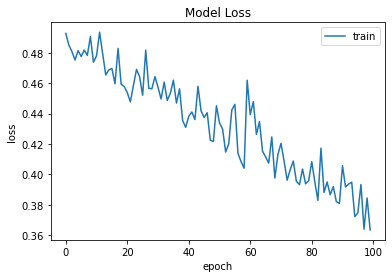

In [29]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'],'g')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')
plt.show()

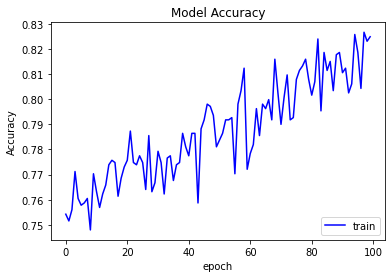

In [30]:
plt.plot(history.history['accuracy'],'b')
#plt.plot(history.history['val_acc'],'g')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='lower right')
plt.show()

In [31]:
#write the tesing input and output variables
score=model.evaluate(X_test,Y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Test loss: 0.6938285231590271
Test accuracy: 0.7145833373069763


In [32]:
y_pred = model.predict(X_test)

In [33]:
y_pred = y_pred > 0.6

In [34]:
y_pred = np.where(y_pred == max(y_pred), 1, 0)

In [35]:
Y_test = Y_test.reshape(-1, 1)

In [36]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

0.7083333333333334
              precision    recall  f1-score   support

           0       0.63      0.85      0.72       213
           1       0.84      0.59      0.69       267

    accuracy                           0.71       480
   macro avg       0.73      0.72      0.71       480
weighted avg       0.74      0.71      0.71       480

